### An Analysis of Flight Delays in the United States: January 2023 - June 2025


### Project Overview

**Created By:**

Bryant Studebaker

**Research Question**

How do different airlines perform in terms of on-time departures, and to what extent are those patterns independent of weather and airport congestion?

**Hypothesis**

Some airlines consistently perform better or worse in terms of departing on time, regardless of weather and airport congestion.

**Context**

Everyone has a general idea that traveling around holidays or airports that are large is always more congested or will have weather, but this will allow you to answer the question of whether the airline you choose will have a better idea of impact on getting flight delays or not.

**Source**

The Bureau of Transportation Statistics

https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E

**Tableau Public Dashboard**

https://public.tableau.com/app/profile/bryant.studebaker/viz/AirlinePerformanceAnalysis_17650805818520/AirlinePerformanceAnalysis

### Exploring the Data

In [30]:
# To start, I'm going to import necessary libraries and load the dataset.
# There are a couple of libraries that are commonly used for data analysis in Python.
# Pandas will be used for data manipulation and analysis, while matplotlib will be used for basic visualization.
# I will also be using statsmodels api for statistical modeling, and scipy.stats for statistical functions.

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("Airline_Delay_Cause.csv")


In [31]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56634 entries, 0 to 56633
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 56634 non-null  int64  
 1   month                56634 non-null  int64  
 2   carrier              56634 non-null  object 
 3   carrier_name         56634 non-null  object 
 4   airport              56634 non-null  object 
 5   airport_name         56634 non-null  object 
 6   arr_flights          56568 non-null  float64
 7   arr_del15            56555 non-null  float64
 8   carrier_ct           56568 non-null  float64
 9   weather_ct           56568 non-null  float64
 10  nas_ct               56568 non-null  float64
 11  security_ct          56568 non-null  float64
 12  late_aircraft_ct     56568 non-null  float64
 13  arr_cancelled        56568 non-null  float64
 14  arr_diverted         56568 non-null  float64
 15  arr_delay            56568 non-null 

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,8.63,3.24,...,0.0,9.72,4.0,0.0,1884.0,561.0,223.0,282.0,0.0,818.0
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,124.0,0.0,0.0,0.0,0.0,124.0
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,7.21,1.82,...,0.0,5.32,2.0,0.0,1698.0,981.0,54.0,294.0,0.0,369.0
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,12.78,2.69,...,0.0,17.19,9.0,0.0,2877.0,827.0,198.0,517.0,0.0,1335.0
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,9.32,0.00,...,0.0,15.61,4.0,0.0,1934.0,638.0,0.0,194.0,0.0,1102.0


In [32]:
# The above code shows that not all columns have the same non-null values. In order to see what rows have null values, I will use the isnull() function to identify them.
# This will help me understand the extent of missing data and decide how to handle it.
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

arr_flights            66
arr_del15              79
carrier_ct             66
weather_ct             66
nas_ct                 66
security_ct            66
late_aircraft_ct       66
arr_cancelled          66
arr_diverted           66
arr_delay              66
carrier_delay          66
weather_delay          66
nas_delay              66
security_delay         66
late_aircraft_delay    66
dtype: int64


In [33]:
# Now that I have identified the columns with null values, I'm going to fill them with zeros as there was no reported delay for those causes.
df.fillna(0, inplace=True)

In [34]:
# Running the same info() and head() functions to confirm that there are no more null values in the dataset.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56634 entries, 0 to 56633
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 56634 non-null  int64  
 1   month                56634 non-null  int64  
 2   carrier              56634 non-null  object 
 3   carrier_name         56634 non-null  object 
 4   airport              56634 non-null  object 
 5   airport_name         56634 non-null  object 
 6   arr_flights          56634 non-null  float64
 7   arr_del15            56634 non-null  float64
 8   carrier_ct           56634 non-null  float64
 9   weather_ct           56634 non-null  float64
 10  nas_ct               56634 non-null  float64
 11  security_ct          56634 non-null  float64
 12  late_aircraft_ct     56634 non-null  float64
 13  arr_cancelled        56634 non-null  float64
 14  arr_diverted         56634 non-null  float64
 15  arr_delay            56634 non-null 

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,8.63,3.24,...,0.0,9.72,4.0,0.0,1884.0,561.0,223.0,282.0,0.0,818.0
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,124.0,0.0,0.0,0.0,0.0,124.0
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,7.21,1.82,...,0.0,5.32,2.0,0.0,1698.0,981.0,54.0,294.0,0.0,369.0
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,12.78,2.69,...,0.0,17.19,9.0,0.0,2877.0,827.0,198.0,517.0,0.0,1335.0
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,9.32,0.00,...,0.0,15.61,4.0,0.0,1934.0,638.0,0.0,194.0,0.0,1102.0


In [35]:
# The second part of this project will be a story with multiple dashboards in Tableau.
# To make it easier to work with in Tableau, I'm going to create a calculated field for total delays and a delay rate.
# The total delays will be the sum of all delay causes, and the delay rate will be the total delays divided by the total flights.
df['total_delays'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)
df['delay_rate'] = df['arr_del15']/df['total_delays']

In [36]:
# My next step is to convert the months from numbers to names for better readability in Tableau as well as season categorization.
def month_to_season(m):
    return ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter'][m-1]

In [37]:
def month_to_name(m):
    return ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][m-1]

In [38]:
df['season'] = df['month'].apply(month_to_season)
df['month_name'] = df['month'].apply(month_to_name)

In [39]:
# Now I'll show the info and head of the final dataframe to confirm all changes.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56634 entries, 0 to 56633
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 56634 non-null  int64  
 1   month                56634 non-null  int64  
 2   carrier              56634 non-null  object 
 3   carrier_name         56634 non-null  object 
 4   airport              56634 non-null  object 
 5   airport_name         56634 non-null  object 
 6   arr_flights          56634 non-null  float64
 7   arr_del15            56634 non-null  float64
 8   carrier_ct           56634 non-null  float64
 9   weather_ct           56634 non-null  float64
 10  nas_ct               56634 non-null  float64
 11  security_ct          56634 non-null  float64
 12  late_aircraft_ct     56634 non-null  float64
 13  arr_cancelled        56634 non-null  float64
 14  arr_diverted         56634 non-null  float64
 15  arr_delay            56634 non-null 

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delays,delay_rate,season,month_name
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,8.63,3.24,...,1884.0,561.0,223.0,282.0,0.0,818.0,1884.0,0.013800,Summer,June
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.00,0.00,...,124.0,0.0,0.0,0.0,0.0,124.0,124.0,0.008065,Summer,June
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,7.21,1.82,...,1698.0,981.0,54.0,294.0,0.0,369.0,1698.0,0.013545,Summer,June
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,12.78,2.69,...,2877.0,827.0,198.0,517.0,0.0,1335.0,2877.0,0.014946,Summer,June
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,9.32,0.00,...,1934.0,638.0,0.0,194.0,0.0,1102.0,1934.0,0.014995,Summer,June


### Airline Delay Analysis with Time-Series and Mapping
Enhanced report including cleaning, time-series exploration, and airport latitude/longitude joining for Tableau mapping.

In [40]:
# Create a datetime column using the first day of each month since there is no column for day.
df['flight_date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delays,delay_rate,season,month_name,flight_date
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,8.63,3.24,...,561.0,223.0,282.0,0.0,818.0,1884.0,0.013800,Summer,June,2025-06-01
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.00,0.00,...,0.0,0.0,0.0,0.0,124.0,124.0,0.008065,Summer,June,2025-06-01
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,7.21,1.82,...,981.0,54.0,294.0,0.0,369.0,1698.0,0.013545,Summer,June,2025-06-01
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,12.78,2.69,...,827.0,198.0,517.0,0.0,1335.0,2877.0,0.014946,Summer,June,2025-06-01
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,9.32,0.00,...,638.0,0.0,194.0,0.0,1102.0,1934.0,0.014995,Summer,June,2025-06-01


### Monthly Time-Series Summary

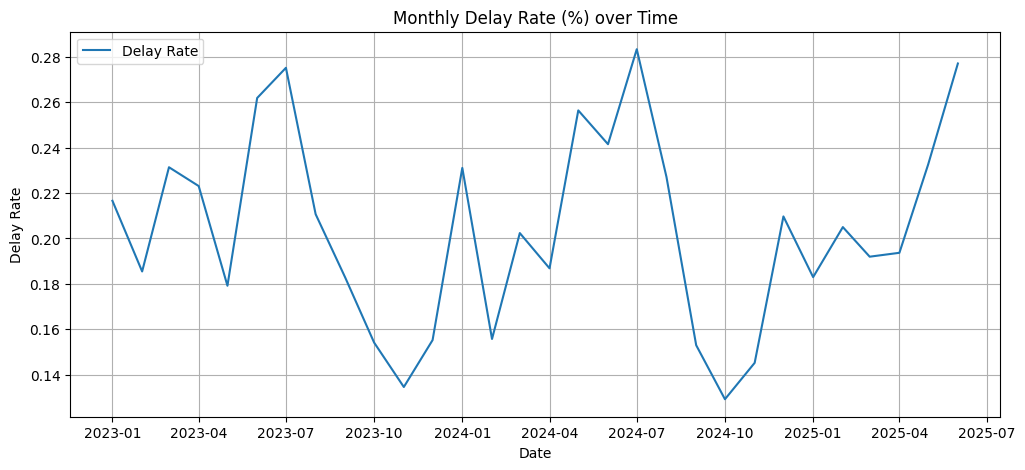

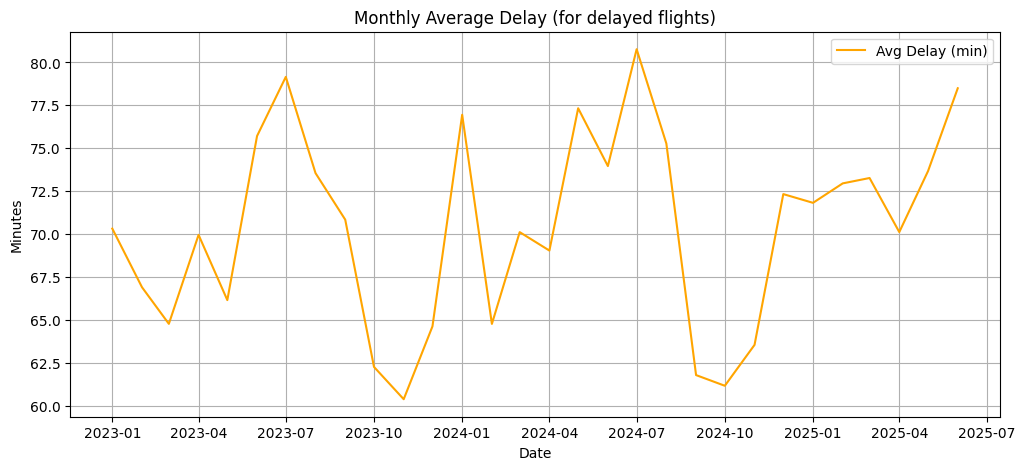

In [41]:
# Aggregate by month and year for the time series analysis.
monthly = df.groupby(pd.Grouper(key='flight_date', freq='MS')).agg({
    'arr_flights':'sum',
    'arr_del15':'sum',
    'arr_delay':'sum',
}).reset_index()

monthly['delay_rate'] = monthly['arr_del15'] / monthly['arr_flights']
monthly['avg_delay'] = monthly['arr_delay'] / monthly['arr_del15']

# Plot trends
plt.figure(figsize=(12,5))
plt.plot(monthly['flight_date'], monthly['delay_rate'], label='Delay Rate')
plt.title("Monthly Delay Rate (%) over Time")
plt.ylabel("Delay Rate")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(monthly['flight_date'], monthly['avg_delay'], color='orange', label='Avg Delay (min)')
plt.title("Monthly Average Delay (for delayed flights)")
plt.ylabel("Minutes")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


### Delay Trends by Airline (Top 5 by Flight Volume)

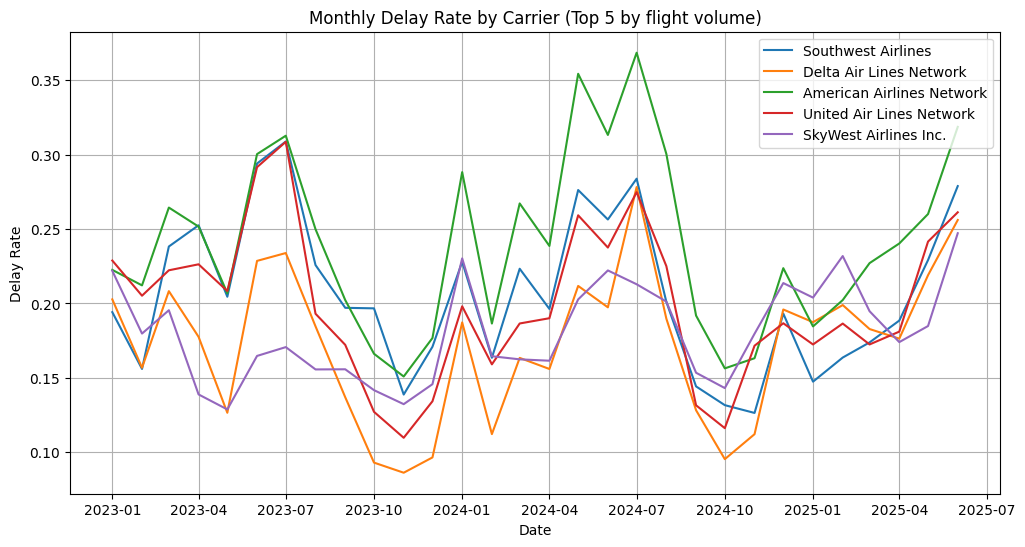

In [42]:
# Plotting the trends by the top 5 carriers by flight volume
if 'carrier_name' in df.columns:
    monthly_carrier = df.groupby([pd.Grouper(key='flight_date', freq='MS'), 'carrier_name']).agg({
        'arr_flights':'sum',
        'arr_del15':'sum',
        'arr_delay':'sum'
    }).reset_index()
    monthly_carrier['delay_rate'] = monthly_carrier['arr_del15'] / monthly_carrier['arr_flights']
    monthly_carrier['avg_delay'] = monthly_carrier['arr_delay'] / monthly_carrier['arr_del15']
    top_carriers = monthly_carrier.groupby('carrier_name')['arr_flights'].sum().nlargest(5).index.tolist()

    fig, ax = plt.subplots(figsize=(12,6))
    for c in top_carriers:
        subset = monthly_carrier[monthly_carrier['carrier_name']==c]
        ax.plot(subset['flight_date'], subset['delay_rate'], label=c)
    ax.legend()
    ax.set_title("Monthly Delay Rate by Carrier (Top 5 by flight volume)")
    ax.set_ylabel("Delay Rate")
    ax.set_xlabel("Date")
    ax.grid(True)
    plt.show()


***Statistical Testing and Modeling***

In [43]:
# Chi-square test to see if there is a significant association between airline and delay status
# Create a binary column for delayed flights (>15 minutes)

df['Delayed'] = df['arr_delay'] > 15

contingency_table = pd.crosstab(df['carrier'], df['Delayed'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between Airline and Delay status.")
else :
    print("Fail to reject the null hypothesis: No significant association between Airline and Delay status.")

Chi-square statistic: 1499.1042177023949
Degrees of freedom: 20
p-value: 6.19937299587784e-306
Reject the null hypothesis: There is a significant association between Airline and Delay status.


In [44]:
# Independent t-test to compare average delay minutes between two airlines

airlineA = df[df['carrier'] == 'OH']['arr_delay']
airlineB = df[df['carrier'] == 'PT']['arr_delay']

t_stat, p_val = ttest_ind(airlineA, airlineB, nan_policy='omit')
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average delay minutes between Airline A and Airline B.")
else :
    print("Fail to reject the null hypothesis: No significant difference in average delay minutes between Airline A and Airline B.")

t-statistic: 5.472696709103012
p-value: 4.672675600966579e-08
Reject the null hypothesis: There is a significant difference in average delay minutes between Airline A and Airline B.


In [45]:
# Multiple Linear Regression to predict Delay Minutes based on Airline, Airport, and Weather Category

X = pd.get_dummies(df[['carrier', 'airport']], drop_first=True)
X['weather_delay'] = pd.to_numeric(df['weather_delay'], errors='coerce')

X = X.dropna()
y = y.loc[X.index]

X = X.astype(int)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     313.9
Date:                Sat, 13 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:10:59   Log-Likelihood:            -5.9604e+05
No. Observations:               56634   AIC:                         1.193e+06
Df Residuals:                   56248   BIC:                         1.196e+06
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           278.2600    804.113      0.346

In [46]:
# Duplicate the dataframe and clean that in order to export to a new CSV for Tableau.
df_cleaned = df.copy()

# Drop unused columns
df_cleaned.drop(columns=['month', 'carrier', 'airport'], inplace=True, errors='ignore')

# Break up the airport names into a city_state column and airport_name column.
df_cleaned[['airport_city_state', 'airport_name_cleaned']] = (
    df_cleaned['airport_name']
    .str.split(':', n=1, expand=True)
    .apply(lambda x: x.str.strip())
)

# Create shorter categorical names for the delay causes to make it easier to read in Tableau.
delay_cause_mapping = {
    'carrier_delay': 'Carrier',
    'weather_delay': 'Weather',
    'nas_delay': 'NAS',
    'security_delay': 'Security',
    'late_aircraft_delay': 'Late Aircraft'
}
df_cleaned.rename(columns=delay_cause_mapping, inplace=True)

# Get rid of longer names for carriers and airports to make it easier to read in Tableau.
# Create a mapping for the carriers.
df_cleaned['carrier_name'] = df['carrier_name'].str.replace(' Inc.', '', regex=False)
df_cleaned['airport_name'] = df['airport_name'].str.replace(' International', '', regex=False)

# Create performance metrics for Tableau.
df_cleaned['total_delays'] = df_cleaned[['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']].sum(axis=1)
df_cleaned['delay_rate'] = df_cleaned['total_delays'] / df_cleaned['arr_del15']
df_cleaned['percent_cancelled'] = (df['arr_cancelled'] / df['arr_flights']) * 100
df_cleaned['percent_diverted'] = (df['arr_diverted'] / df['arr_flights']) * 100
df_cleaned['avg_delay_per_flight'] = df['arr_delay'] / df['arr_flights']



In [47]:
# Demonstrating the final cleaned dataframe.

df_cleaned.head()

,year,carrier_name,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,...,delay_rate,season,month_name,flight_date,Delayed,airport_city_state,airport_name_cleaned,percent_cancelled,percent_diverted,avg_delay_per_flight
0,2025,Endeavor Air,"Allentown/Bethlehem/Easton, PA: Lehigh Valley",90.0,26.0,8.63,3.24,4.41,0.0,9.72,...,72.461538,Summer,June,2025-06-01,True,"Allentown/Bethlehem/Easton, PA",Lehigh Valley International,4.444444,0.0,20.933333
1,2025,Endeavor Air,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.00,0.00,0.00,0.0,1.00,...,124.000000,Summer,June,2025-06-01,True,"Albany, GA",Southwest Georgia Regional,0.000000,0.0,24.800000
2,2025,Endeavor Air,"Alexandria, LA: Alexandria",69.0,23.0,7.21,1.82,8.65,0.0,5.32,...,73.826087,Summer,June,2025-06-01,True,"Alexandria, LA",Alexandria International,2.898551,0.0,24.608696
3,2025,Endeavor Air,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,12.78,2.69,10.34,0.0,17.19,...,66.906977,Summer,June,2025-06-01,True,"Augusta, GA",Augusta Regional at Bush Field,5.806452,0.0,18.561290
4,2025,Endeavor Air,"Albany, NY: Albany",86.0,29.0,9.32,0.00,4.07,0.0,15.61,...,66.689655,Summer,June,2025-06-01,True,"Albany, NY",Albany International,4.651163,0.0,22.488372


In [48]:
# Export the cleaned dataframe to a new CSV file for Tableau.
df_cleaned.to_csv("Airline_Delay_Cleaned.csv", index=False)